# Selforganizing Map

Implementation based on Tensorflow.
Because we want a spatial division of our prices, we need the whole dataset. But we only use 3 Prices a day to thin out the amount of data

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
np.set_printoptions(precision=5, suppress=True)

from sqlalchemy import create_engine

def create_connection():
    host = 'localhost'
    port = '3333'
    return create_engine(f"postgresql://infocup@{host}:{port}/infocup")

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
con = create_connection()

active_stations = pd.read_sql_query("""SELECT station_id,time_stamp, price 
FROM prices_sampled 
WHERE date_part('hour', time_stamp)::int %% 8 = 0
AND time_stamp >= '2017-06-01' limit 100000""", con)

active_stations.head(10)

,station_id,time_stamp,price
0,5641,2017-06-01 00:00:00,1469
1,5641,2017-06-01 08:00:00,1389
2,5641,2017-06-01 16:00:00,1349
3,5641,2017-06-02 00:00:00,1459
4,5641,2017-06-02 08:00:00,1409
5,5641,2017-06-02 16:00:00,1389
6,5641,2017-06-03 00:00:00,1469
7,5641,2017-06-03 08:00:00,1389
8,5641,2017-06-03 16:00:00,1389
9,5641,2017-06-04 00:00:00,1459


In [6]:
active_stations = active_stations.sample(n=1000)

active_stations['time_stamp'] = active_stations['time_stamp'].astype(np.int64) // 10**9
data_np = active_stations.as_matrix()
ids = active_stations.as_matrix(columns=['station_id']).flatten()
data_np

array([[5852,    1, 1329],
       [5670,    1, 1319],
       [5774,    1, 1299],
       ..., 
       [5772,    1, 1349],
       [5792,    1, 1479],
       [5775,    1, 1359]])

In [25]:
from DataExploration import som


som = som.SOM(40, 60, 3, 1000)

som.train(data_np)

AttributeError: 'AxesSubplot' object has no attribute 'show'

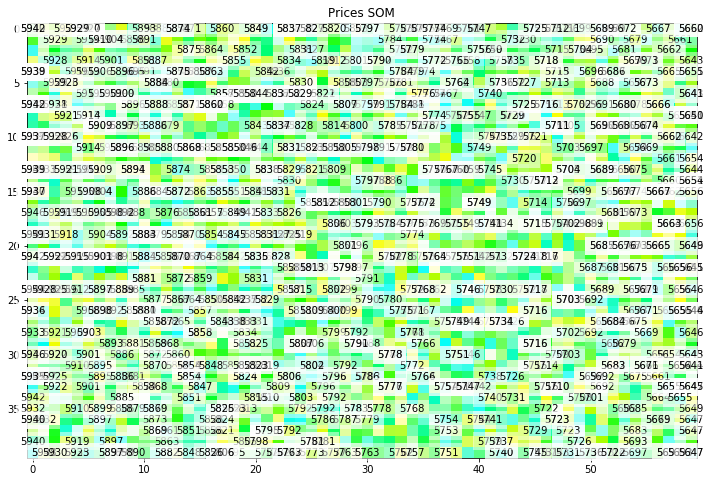

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))

#Get output grid
image_grid = som.get_centroids()
 
#Map colours to their closest neurons
mapped = som.map_vects(data_np)

#Plot
ax.imshow(image_grid, aspect='auto')
plt.title('Prices SOM')
for i, m in enumerate(mapped):
    plt.text(m[1], m[0], ids[i], ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.5, lw=0))
ax.show()

SyntaxError: invalid syntax (<ipython-input-34-3fbcd3d988ea>, line 11)